# Telecom Churn
#### The object is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.
### Data Understanding:

In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

# Reading the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [195]:
print(train_df.shape)
print(test_df.shape)

(69999, 172)
(30000, 171)


In [196]:
train_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [197]:
train_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

## Step 1: Data Cleaning,  Preparation and Pre-Processing:

In [198]:
# Checking the dataset for the amount of null values in percentage
round(train_df.isnull().sum()/len(train_df.index)*100,2).sort_values(ascending=False)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

- Showing several Null values in the data. If customer did not recharge then the value assigned as NaN
- Hence not droping these values blindly. Imputing these columns with Zero. 

- Segregating Categorcial, ID and Numeric columns for ease of analysis:

In [199]:
# Categorcial columns separation : categorical columns are only date here
date_columns = [col for col in train_df.columns if train_df[col].dtype =="object"]    
print(f"Total Categorical columns:{len(date_columns)}")

# ID columns separation
id_columns = ["circle_id"]
print(f"Total numeric columns:{len(id_columns)}")

# Numeric columns separation
numeric_columns = [ col for col in train_df.columns if col not in date_columns + id_columns]    
print(f"Total numeric columns:{len(numeric_columns)}") 

Total Categorical columns:9
Total numeric columns:1
Total numeric columns:162


In [200]:
# When 'total_rech_data' and 'date_of_last_rech_data' is Null, Check 'date_of_last_rech_data','total_rech_data','max_rech_data' etc. 
train_df[train_df["total_rech_data_6"].isna() & train_df["date_of_last_rech_data_6"].isna()][ \
    ["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                          NaN                NaN              NaN   
1                          NaN                NaN              NaN   
2                          NaN                NaN              NaN   
3                          NaN                NaN              NaN   
5                          NaN                NaN              NaN   
...                        ...                ...              ...   
69991                      NaN                NaN              NaN   
69992                      NaN                NaN              NaN   
69994                      NaN                NaN              NaN   
69995                      NaN                NaN              NaN   
69996                      NaN                NaN              NaN   

       max_rech_data_6  av_rech_amt_data_6  
0                  NaN                 NaN  
1                  NaN                 NaN  
2                  NaN                 NaN  
3                  NaN                 NaN  
5                  NaN                 NaN  
...                ...                 ...  
69991              NaN                 NaN  
69992              NaN                 NaN  
69994              NaN                 NaN  
69995              NaN                 NaN  
69996              NaN                 NaN  

[52431 rows x 5 columns]

In [201]:
## Columns which we have to impute as Zero.
impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]
# Put zero in these columns
train_df[impute_zero] = train_df[impute_zero].apply(lambda x: x.fillna(0))

In [202]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_to_update = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8']
train_df[og_data_columns_to_update] = train_df[og_data_columns_to_update].fillna(0)

In [203]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer
ic_data_columns_to_update = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
train_df[ic_data_columns_to_update] = train_df[ic_data_columns_to_update].fillna(0)

In [204]:
categorical_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]

In [205]:
## Fill NaN value as -1 to mark missing value
train_df[categorical_columns] = train_df[categorical_columns].fillna(-1)

In [206]:
## Droping columns having unique values
unique_value_col=[]
for i in train_df.columns:
    if train_df[i].nunique() == 1:
        unique_value_col.append(i)
    else:
        pass
    
train_df.drop(unique_value_col, axis=1, inplace=True)
print("\n Below columns are dropped as their unique value is 1. (i.e.)It has no variance in the model\n", unique_value_col)


 Below columns are dropped as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [207]:
# Checking the related columns values
train_df[['count_rech_2g_8','count_rech_3g_8','total_rech_data_8']].head(15)

count_rech_2g_8  count_rech_3g_8  total_rech_data_8
0               NaN              NaN                0.0
1               NaN              NaN                0.0
2               NaN              NaN                0.0
3               NaN              NaN                0.0
4               6.0              0.0                6.0
5               NaN              NaN                0.0
6               NaN              NaN                0.0
7               1.0              0.0                1.0
8               NaN              NaN                0.0
9               NaN              NaN                0.0
10              NaN              NaN                0.0
11              NaN              NaN                0.0
12              NaN              NaN                0.0
13              NaN              NaN                0.0
14              NaN              NaN                0.0

In [208]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7 and 8 
train_df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'],axis=1, inplace=True)

In [209]:
round(train_df.isnull().sum()/len(train_df.index)*100,2).sort_values(ascending=False).head(15)

arpu_3g_6                   74.90
date_of_last_rech_data_6    74.90
arpu_2g_6                   74.90
date_of_last_rech_data_7    74.48
arpu_2g_7                   74.48
arpu_3g_7                   74.48
arpu_2g_8                   73.69
date_of_last_rech_data_8    73.69
arpu_3g_8                   73.69
date_of_last_rech_8          3.52
date_of_last_rech_7          1.76
date_of_last_rech_6          1.57
id                           0.00
max_rech_amt_7               0.00
last_day_rch_amt_6           0.00
dtype: float64

In [210]:
# Columns having values as date
date_columns =  train_df.columns[train_df.columns.str.contains('date')]
print(date_columns)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [211]:
# Converting the selected columns to datetime format
for i in date_columns:
    train_df[i] = pd.to_datetime(train_df[i])

In [212]:
# Checking the related columns values
train_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0        NaN        NaN                 0.0
1        NaN        NaN                 0.0
2        NaN        NaN                 0.0
3        NaN        NaN                 0.0
4        0.0        0.0               175.0
5        NaN        NaN                 0.0
6        NaN        NaN                 0.0
7        0.0        0.0               198.0
8        NaN        NaN                 0.0
9        NaN        NaN                 0.0

In [213]:
print("Correlation table for month 6\n\n", train_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", train_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", train_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


##### From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 8 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 8 respectively. Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*

In [214]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
train_df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1, inplace=True)

#### Above records also shows, we can conclude, the date_of_last_rech_data_* corresponding to months 6,7 and 8 are of no value after the conditional imputation of of columns total_rech_data_*,max_rech_data_*are completes. Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [215]:
# Dropping the columns related to datetime dtype from the dataset
train_df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8"], axis=1, inplace=True)

- As we can no more utilise the datetime column, we can drop the `date_of_last_rech_data_*` column corresponding to months 6,7 and 8 respectively.

In [216]:
# Dropping the columns related to datetime dtype from the dataset
train_df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8"], axis=1, inplace=True)

In [217]:
round(train_df.isnull().sum()/len(train_df.index)*100,2).sort_values(ascending=False).head(10)

id                  0.0
max_rech_amt_6      0.0
total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
max_rech_amt_7      0.0
ic_others_7         0.0
dtype: float64

In [218]:
## Validate if still any column have null/missing values
train_df.isnull().values.any()

False

In [219]:
# List only the numeric columns
numeric_cols = train_df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=141)


In [220]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = train_df[col].quantile(0.10)
    q3 = train_df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = train_df.loc[(train_df[col] > range_low) & (train_df[col] < range_high)]

data.shape

(69999, 141)

# Step 2: Feature Engineering and Variable Transformation

### Filter high-value customers:
- We need to predict churn only for the high-value customers.
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [221]:
## Calculate total Data recharge amount --> Total Data Recharge * Average Amount of Data recharge
train_df["total_data_recharge_amnt_6"] = train_df.total_rech_data_6 * train_df.av_rech_amt_data_6
train_df["total_data_recharge_amnt_7"] = train_df.total_rech_data_7 * train_df.av_rech_amt_data_7

In [222]:
## Calculate Total Amount recharge --> total talktime recharge + total data recharge
train_df["total_recharge_amnt_6"] = train_df.total_rech_amt_6 + train_df.total_data_recharge_amnt_6
train_df["total_recharge_amnt_7"] = train_df.total_rech_amt_7 + train_df.total_data_recharge_amnt_7

In [223]:
## Calculate Average amount of recharge of 6th and 7th month
train_df['average_amnt_6_7'] = (train_df["total_recharge_amnt_6"] + train_df["total_recharge_amnt_7"])/2

In [224]:
## Checking the 70th percentile of "average_amnt_6_7"
train_df['average_amnt_6_7'].quantile(.70)

477.5

- 70th percentile of average amount recharge in 6th and 7th month comes as 477.5
- Now we need to filter the data based on this value.

In [225]:
## Filtering based on 70th percentile
telecom_highvalue = train_df[train_df["average_amnt_6_7"]>= train_df["average_amnt_6_7"].quantile(.70)]

In [226]:
## Delete the derived columns created in above step
telecom_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [227]:
telecom_highvalue.shape

(21013, 141)

In [228]:
telecom_highvalue.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4    4   240.708  128.191  101.565        21.28         4.83         6.13   
15  15   580.549  377.294  338.286        10.43        24.99       194.43   
23  23  1130.948  905.506  479.762       859.53       372.71         0.89   
24  24   371.974  352.069  240.449        93.18        38.29        29.86   
27  27   390.489  350.985  421.300         8.58        11.48        12.68   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4          56.99         38.11          9.63          53.64            0.0   
15        317.11        341.79        197.09           0.00            0.0   
23        293.46        450.11        386.91           0.00            0.0   
24        531.19        507.76        222.03           0.00            0.0   
27        133.16        158.73        182.83           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4             0.0          15.73            0.0            0.0   
15            0.0           0.00            0.0            0.0   
23            0.0           0.00            0.0            0.0   
24            0.0           0.00            0.0            0.0   
27            0.0           0.00            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4              10.16              4.83              6.13             36.74   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
27              8.58             11.48             12.68             96.91   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4              19.88              4.61             11.99              1.23   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
27            149.44            157.23             33.71              9.28   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
4               5.01               0.0              9.85              0.00   
15              4.94               0.0              0.00              0.00   
23              8.88               0.0              0.00              0.00   
24              0.00               0.0              0.00              0.36   
27             25.59               0.0              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
4          58.91         25.94         15.76               0.0   
15        327.46        366.79        385.26               0.0   
23        950.91        822.78        387.79               0.0   
24        252.48        257.74        129.73               0.0   
27        139.21        170.21        195.51               0.0   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
4                0.0               0.0              4.35              0.00   
15               0.0               0.0              0.00              0.00   
23               0.0               0.0            202.08              0.00   
24               0.0               0.0            371.89            288.31   
27               0.0               0.0              2.53              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
4               0.00               0.0               0.0              0.00   
15              0.00               0.0               0.0              6.26   
23              0.00               0.0               0.0              0.00   
24            121.79               0.0               0.0              0.00   
27          

##### Tag churners and remove attributes of the churn phase:

In [229]:
## Calculate total call in mins by adding Incoming and Outgoing calls
telecom_highvalue['total_calls_8'] = telecom_highvalue.total_ic_mou_8 + telecom_highvalue.total_og_mou_8

In [230]:
# Calculate total 2G and 3G consumption of data
telecom_highvalue["total_data_usage"] = telecom_highvalue.vol_2g_mb_8 + telecom_highvalue.vol_3g_mb_8

- Now we need to create Churn variable.
- Customer who have not used any calls or have not consumed any data on month of 9 are tagged as Churn customer.
- Churn customer is marked as 1 and Non-churn custoner is marked as 0

In [231]:
## Tag 1 as churner  where total_calls_9=0 and total_data_consumptions=0 else 0 as non-churner
telecom_highvalue["churn"]=telecom_highvalue.apply(lambda row:1 if (row.total_calls_8==0 and row.total_data_usage==0) else 0,axis=1)

In [232]:
## Check the percentages of churn and non churn data
telecom_highvalue["churn"].value_counts(normalize=True)

0    0.9467
1    0.0533
Name: churn, dtype: float64

- The data is imbalance.
- Churn percentage is close 5 and non-churn percentage is close to 94.

In [233]:
# Droping the derived columns
telecom_highvalue.drop(columns=["total_calls_8","total_data_usage"],inplace=True)

In [234]:
# Droping all 8th month columns
telecom_highvalue = telecom_highvalue.filter(regex='[^8]$',axis=1)

In [235]:
telecom_highvalue.shape

(21013, 97)

# Step 3: Data Visualization:
# Performing EDA

In [236]:
## Check the percenatges of churn and non-churn customers
telecom_highvalue["churn"].value_counts(normalize=True)

0    0.9467
1    0.0533
Name: churn, dtype: float64

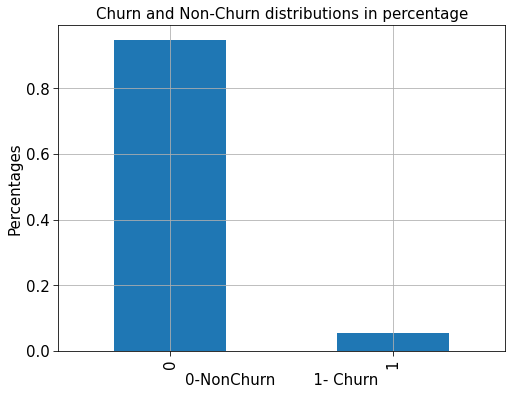

In [237]:
# Plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
telecom_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

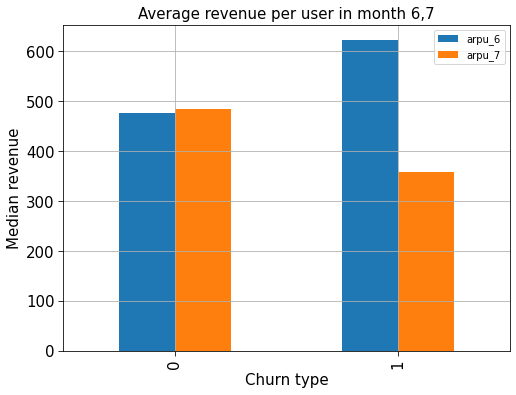

In [238]:
# Plot to visualize average revenue per user(ARPU)
telecom_highvalue.groupby("churn")["arpu_6","arpu_7"].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7",fontsize=15)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

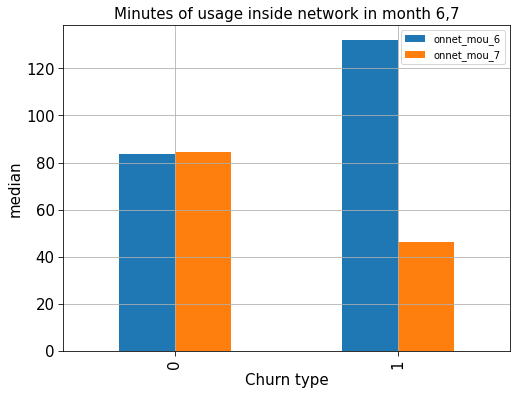

In [239]:
## Plot to visualize onnet_mou
telecom_highvalue.groupby("churn")["onnet_mou_6","onnet_mou_7" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

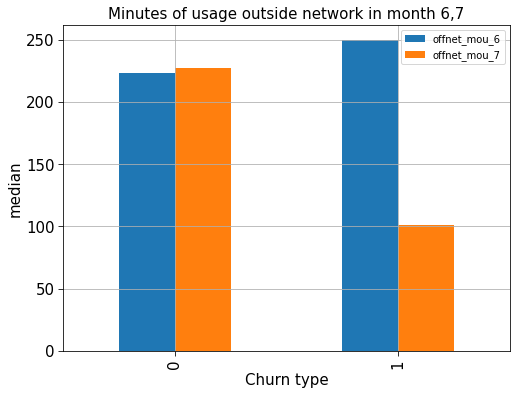

In [240]:
# Plot to visualize  offnet_mou
telecom_highvalue.groupby("churn")["offnet_mou_6","offnet_mou_7" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage outside network in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

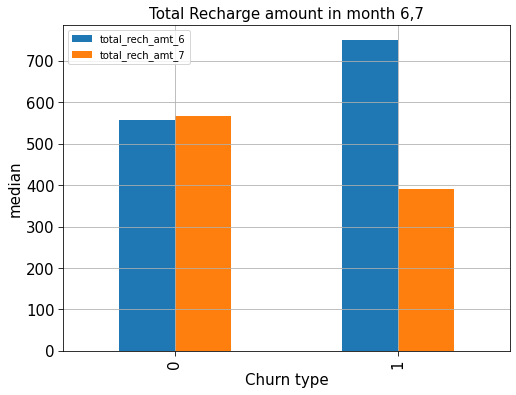

In [241]:
# Plot to visualize total_rech_amt
telecom_highvalue.groupby("churn")["total_rech_amt_6","total_rech_amt_7" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

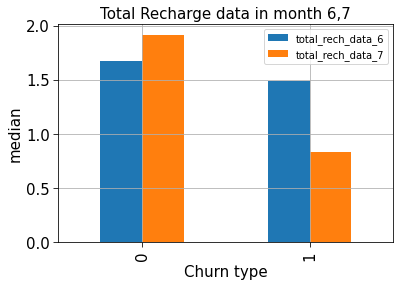

In [242]:
# Plot to visualize total_rech_data_
telecom_highvalue.groupby("churn")["total_rech_data_6","total_rech_data_7" ].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge data in month 6,7",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

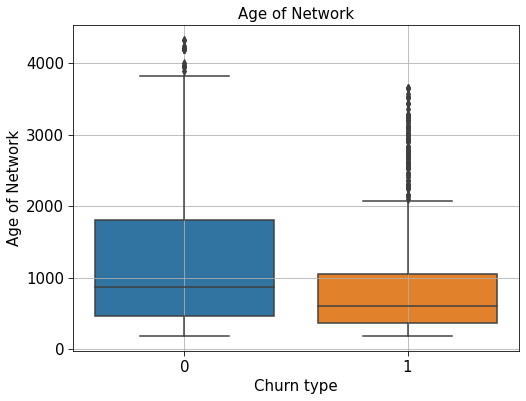

In [243]:
plt.figure(figsize=[8,6])
sns.boxplot(data=telecom_highvalue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 15) 
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

- Median Age of network less,more likely to churn

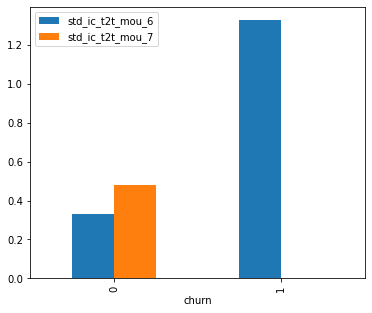

In [244]:
telecom_highvalue.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7"].median().plot.bar(figsize=[6,5])
plt.show()

- Users who are using more STD calls are more likely to churn.

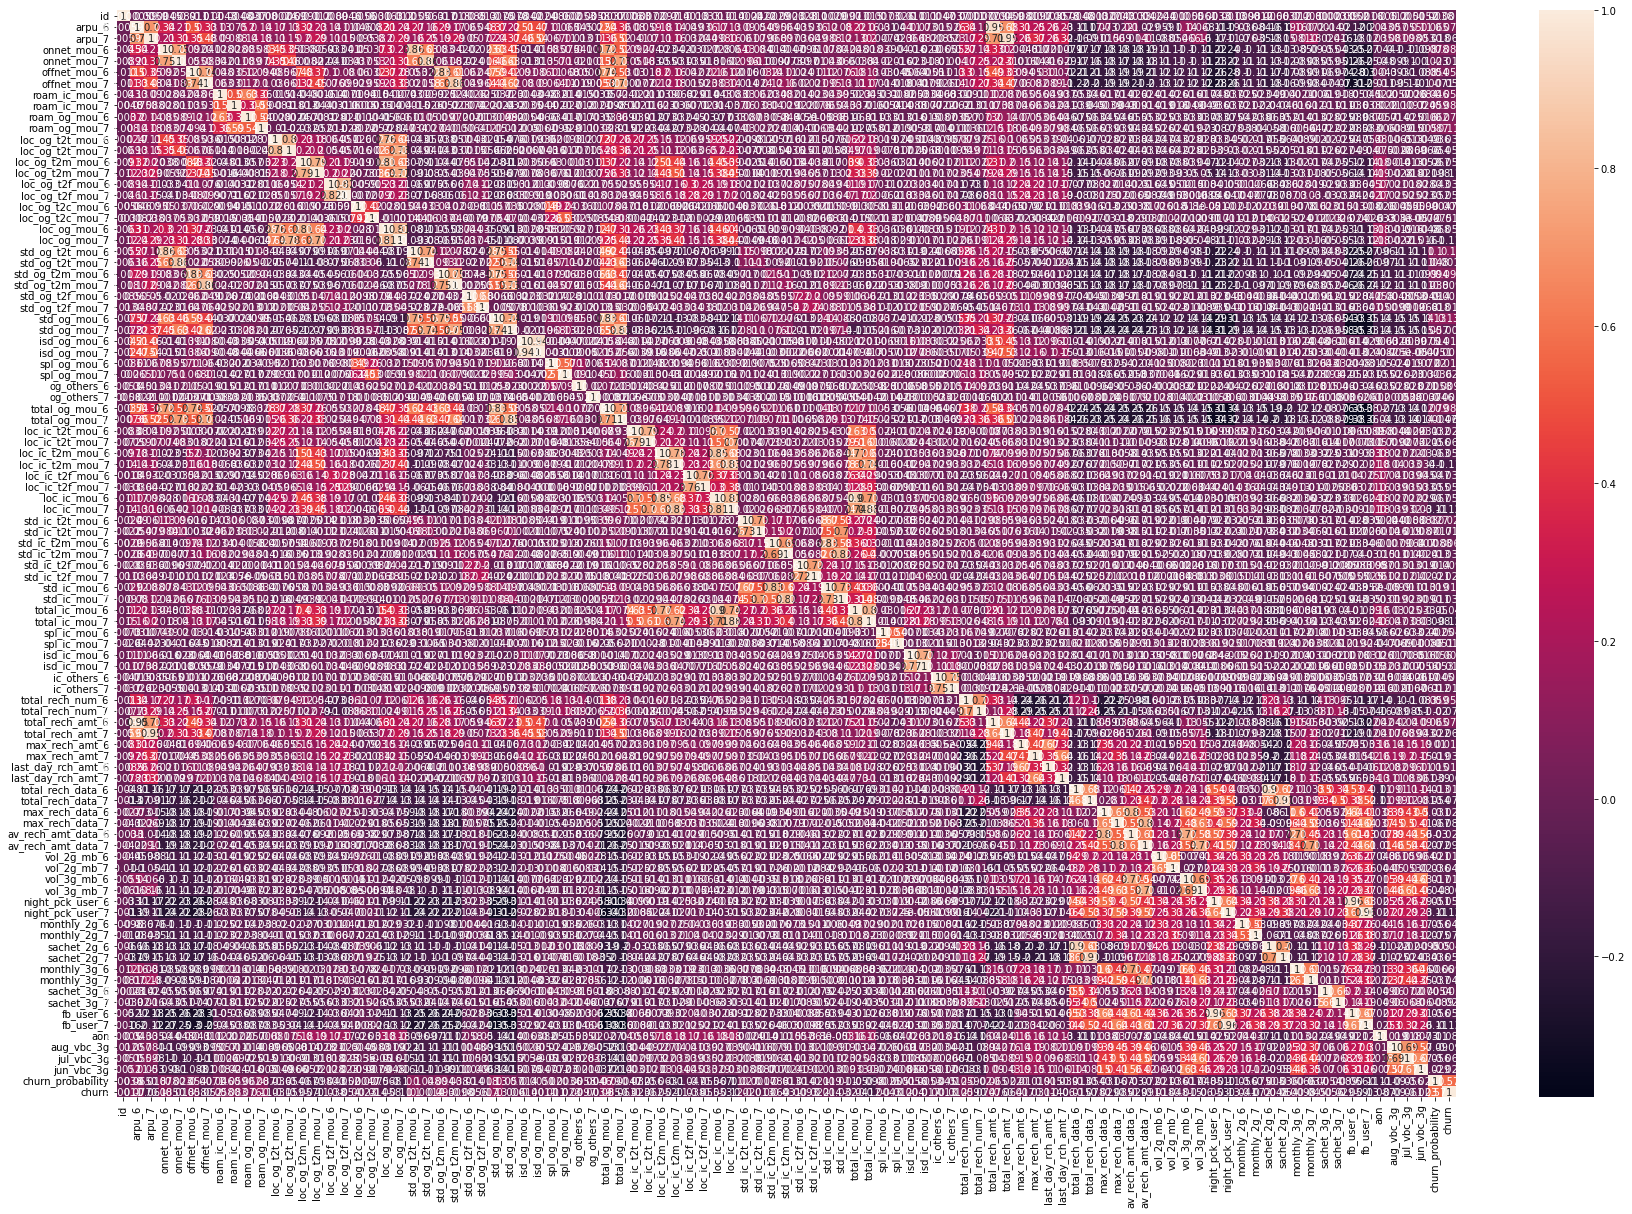

In [245]:
# Checking the correlation between variables
plt.figure(figsize= (30,20))
sns.heatmap(telecom_highvalue.corr(), annot=True)
plt.show()

- Average revenue per user more in month 6 means, if they are unsatisfied, those useres are more likely to churn
- Users whose minutes of usage are more in month 6, they are more likely to churn.
- The users who have big difference of minutes of call duration to other network between month 6 and month 7 are likely to churn.
- When the difference of total recharge amount is more, those users are more likely to churn.
- Average recharge amount in month 6 and 7 is none, from dataset, they are more likely to churn.
- Total outgoing minute usage difference is more between month 6 and 7, users are mor likely to chrun

# Step 4: Model Selection, Model Building, and  Prediction:

In [246]:
telecom_highvalue.shape

(21013, 97)

In [247]:
telecom_highvalue.head(5)

id    arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
4    4   240.708  128.191        21.28         4.83         56.99   
15  15   580.549  377.294        10.43        24.99        317.11   
23  23  1130.948  905.506       859.53       372.71        293.46   
24  24   371.974  352.069        93.18        38.29        531.19   
27  27   390.489  350.985         8.58        11.48        133.16   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4          38.11          53.64            0.0          15.73            0.0   
15        341.79           0.00            0.0           0.00            0.0   
23        450.11           0.00            0.0           0.00            0.0   
24        507.76           0.00            0.0           0.00            0.0   
27        158.73           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16              4.83             36.74             19.88   
15             10.43             24.99            313.76            330.88   
23            859.53            372.71             79.79            424.63   
24             93.18             38.29            159.29            219.44   
27              8.58             11.48             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4              11.99              1.23               0.0              9.85   
15              3.26             10.91               0.0              0.00   
23             11.58             25.43               0.0              0.00   
24              0.00              0.00               0.0              0.00   
27             33.71              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        950.91        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  \
4           4.35          0.00           0.0           0.0          0.00   
15          0.00          0.00           0.0           0.0          0.08   
23        202.08          0.00           0.0           0.0          0.00   
24        371.89        288.31           0.0           0.0          0.00   
27          2.53          0.00           0.0           0.0          0.00   

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4          17.00          0.0          0.0           63.26           42.94   
15          0.00          0.1          0.0          327.64          366.79   
23          0.05          0.0          0.0         1152.99          822.83   
24          0.00          0.0          0.0          624.38          546.06   
27          0.00          0.0          0.0          141.74          170.21   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4               5.44              1.39             10.58              4.33   
15             13.86             20.18            219.31            754.24   
23            233.28            117.63            123.78            278.49   
24             52.49             37.84    

In [248]:
df_churn = telecom_highvalue[:].copy()

In [249]:
df_churn.drop(['churn_probability'],axis=1, inplace=True)

In [250]:
y = df_churn.pop('churn')
y.head()

4     0
15    0
23    0
24    0
27    0
Name: churn, dtype: int64

In [251]:
X = df_churn
X.shape

(21013, 95)

In [252]:
# Importing required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [253]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [254]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (14709, 95)
X_test shape (6304, 95)
y_train shape (14709,)
y_test shape (6304,)


#### Aggregating the categorical columns:

In [255]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())

night_pck_user_6
-1.0    0.067271
 0.0    0.040849
 1.0    0.067358
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.086340
 0.0    0.027679
 1.0    0.020305
Name: churn, dtype: float64
fb_user_6
-1.0    0.067271
 0.0    0.066667
 1.0    0.039538
Name: churn, dtype: float64
fb_user_7
-1.0    0.086340
 0.0    0.063091
 1.0    0.024586
Name: churn, dtype: float64


In [256]:
# Replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.067271, 0: 0.040849, 1: 0.067358},
           'night_pck_user_7' : {-1: 0.086340, 0: 0.027679, 1: 0.020305},
           'fb_user_6'        : {-1: 0.067271, 0: 0.066667, 1: 0.039538},
           'fb_user_7'        : {-1: 0.086340, 0: 0.063091, 1: 0.024586}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [257]:
# Segregate  X_train and y_train 
y_train = train.pop("churn")
X_train = train

### Perform Oversampling with SMOTE:

In [258]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [259]:
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (27862, 95)
Value count of training target variable:
1    13931
0    13931
Name: churn, dtype: int64


### Feature Scaling:

In [260]:
num_col = X_train_resample.select_dtypes(include = ['int64','float64']).columns.tolist()

In [261]:
# Standardization method
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train_resample[num_col] = scaler.fit_transform(X_train_resample[num_col])

In [262]:
#Form the dataframe after scaling
X_train_scale = pd.DataFrame(X_train_resample,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(27862, 95)

In [263]:
# Perform the scaling on test set
temp_x_test = scaler.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

### PCA:

In [264]:
from sklearn.decomposition import PCA

In [265]:
pca = PCA(random_state=42)
pca.fit(X_train_resample)

PCA(random_state=42)

In [266]:
# Components from the PCA
pca.components_

array([[ 1.49265168e-02, -1.02843654e-02, -4.90467663e-03, ...,
         1.11987896e-02,  1.93362700e-02,  2.35352617e-02],
       [ 4.16578330e-02, -7.52118049e-03,  1.55606981e-02, ...,
         6.01607678e-03,  4.83038907e-03, -2.25389798e-02],
       [-9.98314145e-01,  2.10946120e-03, -7.67093998e-04, ...,
        -3.26666664e-05,  2.64886227e-03, -1.74284406e-03],
       ...,
       [ 2.81239311e-08,  1.08251094e-06,  4.57692925e-08, ...,
        -7.95371796e-08, -1.96699785e-07, -9.04793342e-08],
       [ 1.90446586e-08, -3.06528309e-07,  3.71526633e-07, ...,
         3.32569031e-08,  1.38553441e-07,  8.57722886e-08],
       [ 1.38396833e-08, -6.50111835e-07, -2.85949142e-07, ...,
        -1.42661186e-07,  6.99086925e-08,  1.08104907e-07]])

In [267]:
pca.explained_variance_ratio_

array([5.39550318e-01, 1.40807115e-01, 9.88905666e-02, 5.27123777e-02,
       3.01049104e-02, 1.56506554e-02, 1.42300397e-02, 1.22719222e-02,
       1.03569196e-02, 9.19143474e-03, 6.76995932e-03, 5.87679212e-03,
       5.08426513e-03, 4.50575254e-03, 3.95848774e-03, 3.44396056e-03,
       2.97783252e-03, 2.76645414e-03, 2.75640793e-03, 2.51480331e-03,
       2.41855139e-03, 2.17302453e-03, 2.05170745e-03, 2.04435615e-03,
       1.78852376e-03, 1.73642980e-03, 1.63340921e-03, 1.49255574e-03,
       1.43051103e-03, 1.40554568e-03, 1.24320989e-03, 1.14621840e-03,
       1.10268769e-03, 9.62766335e-04, 8.06363150e-04, 7.48806081e-04,
       7.28173630e-04, 7.15758076e-04, 6.89740514e-04, 6.49668058e-04,
       6.36049219e-04, 6.24226762e-04, 6.00390843e-04, 5.59541157e-04,
       4.73305122e-04, 4.63465126e-04, 3.86351887e-04, 3.74690155e-04,
       3.72577701e-04, 3.43793558e-04, 3.40075164e-04, 3.14397830e-04,
       3.05596670e-04, 2.80674844e-04, 2.65115946e-04, 2.24266728e-04,
      

- Making a Scree Plot for the explained variance

In [268]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

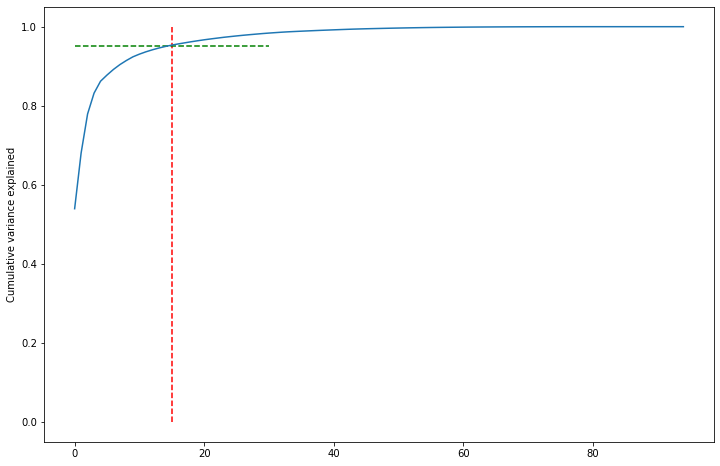

In [269]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

<BarContainer object of 95 artists>

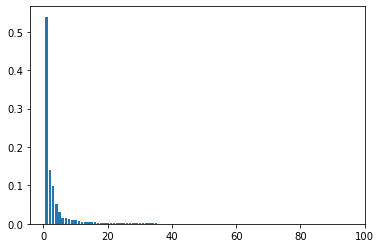

In [270]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Perform PCA with 32 components

In [271]:
from sklearn.decomposition import IncrementalPCA

In [272]:
pca_final = IncrementalPCA(n_components=32)

In [273]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(14709, 32)

In [274]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(32, 32)

#### Plotting the heatmap of the corr matrix

<AxesSubplot:>

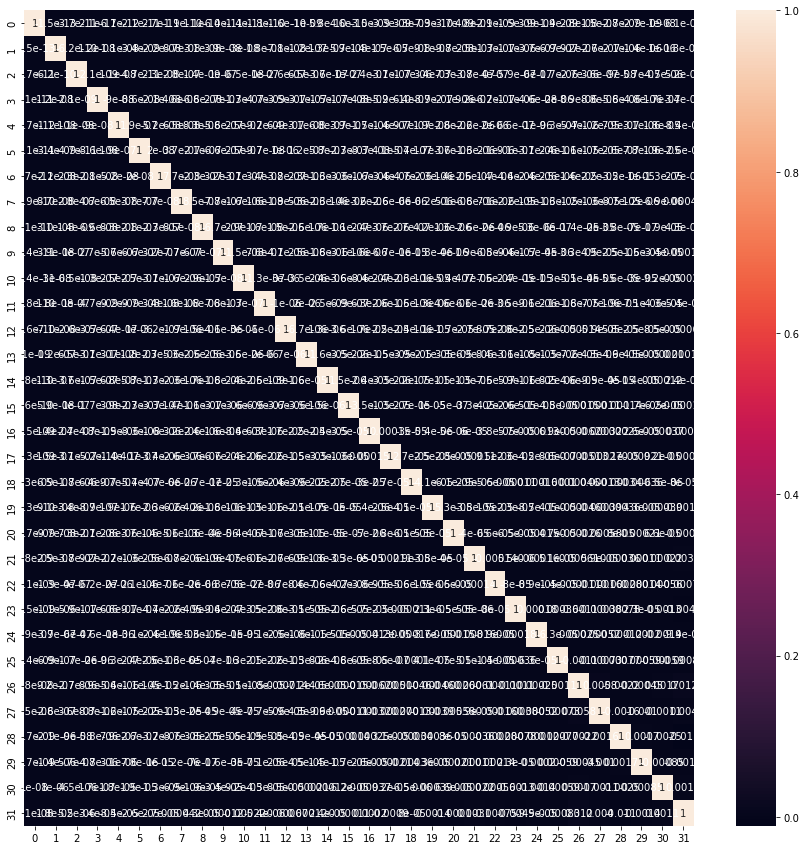

In [275]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Applying the transformation on the test set:

In [276]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6304, 32)

#### Applying logistic regression on the data on our Principal components

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [278]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making predictions on the test set: 

In [279]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [280]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

## Model Building
### Logistic Regression:

In [281]:
#Function definition to check the performance of model on test data
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]}) 

In [282]:
# Create a DataFrame which stores all test score for each model
df_score = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

In [283]:
from sklearn.metrics import confusion_matrix

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Tuning hyperparameter C:
- C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization 

In [284]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [285]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.360548      0.030868         0.003124        0.006249    0.01   
1       0.395697      0.028595         0.009376        0.007655     0.1   
2       0.374844      0.013071         0.009572        0.007416       1   
3       0.389915      0.022292         0.012496        0.006248      10   
4       0.383348      0.015023         0.009375        0.007655     100   
5       0.390383      0.010981         0.009373        0.007653    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.863014           0.889706           0.875740   
1   {'C': 0.1}           0.883562           0.882353           0.869822   
2     {'C': 1}           0.863014           0.897059           0.875740   
3    {'C': 10}           0.863014           0.882353           0.869822   
4   {'C': 100}           0.863014           0.889706           0.863905   
5  {'C': 1000}           0.863014           0.882353           0.875740   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.896341           0.889571         0.882874        0.011985   
1           0.896341           0.877301         0.881876        0.008701   
2           0.902439           0.877301         0.883110        0.014561   
3           0.896341           0.871166         0.876539        0.011686   
4           0.902439           0.883436         0.880500        0.015204   
5           0.902439           0.865031         0.877715        0.014239   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.887658            0.875389   
1                3            0.886076            0.880062   
2                1            0.884494            0.880062   
3                6            0.889241            0.876947   
4                4            0.889241            0.875389   
5                5            0.889241            0.872274   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.886700            0.892508            0.881301   
1            0.886700            0.885993            0.868293   
2            0.886700            0.885993            0.871545   
3            0.886700            0.882736            0.865041   
4            0.888342            0.890879            0.879675   
5            0.888342            0.892508            0.865041   

   mean_train_score  std_train_score  
0          0.884711         0.005864  
1          0.881425         0.006995  
2          0.881759         0.005604  
3          0.880133         0.008611  
4          0.884705         0.006066  
5          0.881481         0.010807

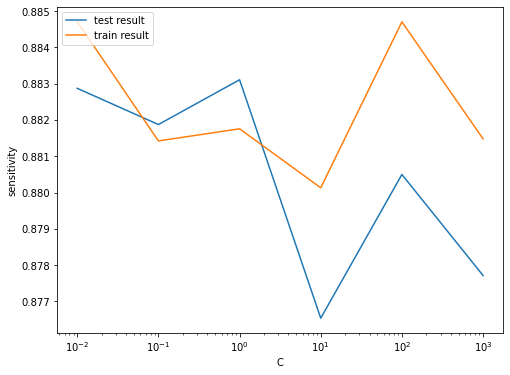

In [286]:
# Plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [287]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8831103610034278 at C = 1


- Logistic regression with optimal C:

In [288]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [289]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(df_train_pca, y_train)

- Prediction on the train set: 

In [290]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(df_train_pca)

In [291]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7333 6598]
 [  90  688]]


In [292]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [293]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.5453123937725203
Sensitivity:- 0.884318766066838
Specificity:- 0.5263800157921183


- Prediction on the test set

In [294]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(df_test_pca)

In [295]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3082 2880]
 [  39  303]]


In [296]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [297]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.5369606598984772
Sensitivity:- 0.8859649122807017
Specificity:- 0.516940623951694


##### Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision tree:

In [298]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

- Hyperparameter tuning: 

In [299]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [300]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.716580      0.083182         0.004958        0.006405   
1       0.761219      0.034796         0.003124        0.006248   
2       0.683614      0.090050         0.006448        0.007499   
3       0.733050      0.079913         0.003896        0.007793   
4       1.151927      0.071495         0.007880        0.006988   
5       1.253473      0.104251         0.004121        0.006065   
6       1.203295      0.061010         0.005850        0.005759   
7       1.337682      0.065947         0.005191        0.004848   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.096154   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.096154   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.000000   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.000000   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.096154   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.096154   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.000000   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.064103           0.096154           0.051613           0.077419   
1           0.064103           0.096154           0.051613           0.077419   
2           0.121795           0.121795           0.090323           0.103226   
3           0.121795           0.121795           0.090323           0.103226   
4           0.083333           0.096154           0.051613           0.077419   
5           0.083333           0.096154           0.051613           0.077419   
6           0.121795           0.121795           0.090323           0.103226   
7           0.121795           0.121795           0.090323           0.103226   

   mean_test_score  std_test_score  rank_test_score  
0         0.077089        0.017577                7  
1         0.077089        0.017577                7  
2         0.087428        0.045307                1  
3         0.087428        0.045307                1  
4         0.080935        0.016378                5  
5         0.080935        0.016378                5  
6         0.087428        0.045307                1  
7         0.087428        0.045307                1

In [301]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.08742762613730355
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


- Model with optimal hyperparameters

In [302]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

- Predictions on the train set

In [303]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(df_train_pca)

In [304]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13906    25]
 [  721    57]]


In [305]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [306]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.949282752056564
Sensitivity:- 0.07326478149100257
Specificity:- 0.998205441102577


- Prediction on the test set

In [307]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(df_test_pca)

In [308]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5939   23]
 [ 321   21]]


In [309]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [310]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9454314720812182
Sensitivity:- 0.06140350877192982
Specificity:- 0.9961422341496142


In [311]:
#Train the decision tree with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_resample,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [312]:
#perform the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [313]:
df_2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.2211652794292509
recall: 0.543859649122807
f1_score: 0.3144547759932375
roc_auc: 0.7913655392534786


### Random forest: 

In [314]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

- Hyperparameter tuning: 

In [315]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [316]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9475831123801753 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


- Model with optimal hyperparameters:

In [317]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [318]:
# Fit the model
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [319]:
# Predictions on the train set
y_train_pred = rfc_model.predict(df_train_pca)

In [320]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13916    15]
 [  731    47]]


In [321]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [322]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.949282752056564
Sensitivity:- 0.060411311053984576
Specificity:- 0.9989232646615462


- Prediction on the test set

In [323]:
# Prediction on the test set
y_test_pred = rfc_model.predict(df_test_pca)

In [324]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5950   12]
 [ 326   16]]


In [325]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [326]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9463832487309645
Sensitivity:- 0.04678362573099415
Specificity:- 0.9979872525997987


In [327]:
#Train the Random Forest with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = RandomForestClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_resample,y_train_resample)

RandomForestClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [328]:
# Perform the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
# Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [329]:
df_3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_dt,pred_prob[:,1])

RandomForest:
precision: 0.27361963190184047
recall: 0.652046783625731
f1_score: 0.38547968885047534
roc_auc: 0.8752229029467329


### GradientBoosting:

In [330]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_test_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_scale)

In [331]:
#check the training default parameters
gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [332]:
# Check the test scores
df_4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.3333333333333333
recall: 0.5029239766081871
f1_score: 0.4009324009324009
roc_auc: 0.8807908174775527


#### Fearure Importance and Model Interpretation

In [333]:
# Randomforest model training 
gb_object = RandomForestClassifier(random_state=40)
gb_object.fit(X_train_resample,y_train_resample)
y_pred = gb_object.predict(X_test)

In [334]:
# Check the performance on test data
calculate_peformance_testdata("RandomForest",y_test,y_pred,pred_prob[:,1])

RandomForest:
precision: 0.07528409090909091
recall: 0.30994152046783624
f1_score: 0.12114285714285716
roc_auc: 0.8807908174775527


Model  precision    recall  f1_score   roc_auc
0  RandomForest   0.075284  0.309942  0.121143  0.880791

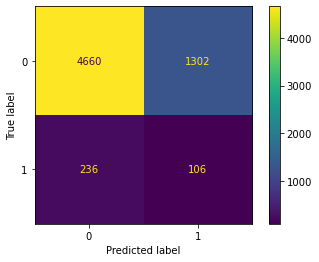

In [335]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb_object, X_test, y_test)
plt.show()

In [336]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train.columns,"feature_importance":gb_object.feature_importances_})

In [337]:
# Check 40 important features
FI = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
FI

columns  feature_importance
10       roam_og_mou_7            0.126650
8        roam_ic_mou_7            0.106362
90           fb_user_7            0.040388
92          aug_vbc_3g            0.039692
80    night_pck_user_7            0.032149
44        loc_ic_mou_7            0.029812
20        loc_og_mou_7            0.029127
14    loc_og_t2m_mou_7            0.021727
54      total_ic_mou_7            0.020971
2               arpu_7            0.019220
68  last_day_rch_amt_7            0.019093
64    total_rech_amt_7            0.018662
72     max_rech_data_7            0.018260
40    loc_ic_t2m_mou_7            0.017373
70   total_rech_data_7            0.016097
74  av_rech_amt_data_7            0.015657
36      total_og_mou_7            0.015618
66      max_rech_amt_7            0.014588
62    total_rech_num_7            0.012084
12    loc_og_t2t_mou_7            0.011060
31        spl_og_mou_6            0.010585
21    std_og_t2t_mou_6            0.010191
38    loc_ic_t2t_mou_7            0.010087
27        std_og_mou_6            0.009805
79    night_pck_user_6            0.009711
45    std_ic_t2t_mou_6            0.009303
0                   id            0.008957
94          jun_vbc_3g            0.008872
78         vol_3g_mb_7            0.008603
91                 aon            0.008340
89           fb_user_6            0.008216
6         offnet_mou_7            0.008141
67  last_day_rch_amt_6            0.007373
28        std_og_mou_7            0.007247
1               arpu_6            0.007173
71     max_rech_data_6            0.007173
69   total_rech_data_6            0.007090
75         vol_2g_mb_6            0.006893
65      max_rech_amt_6            0.006853
63    total_rech_amt_6            0.006632

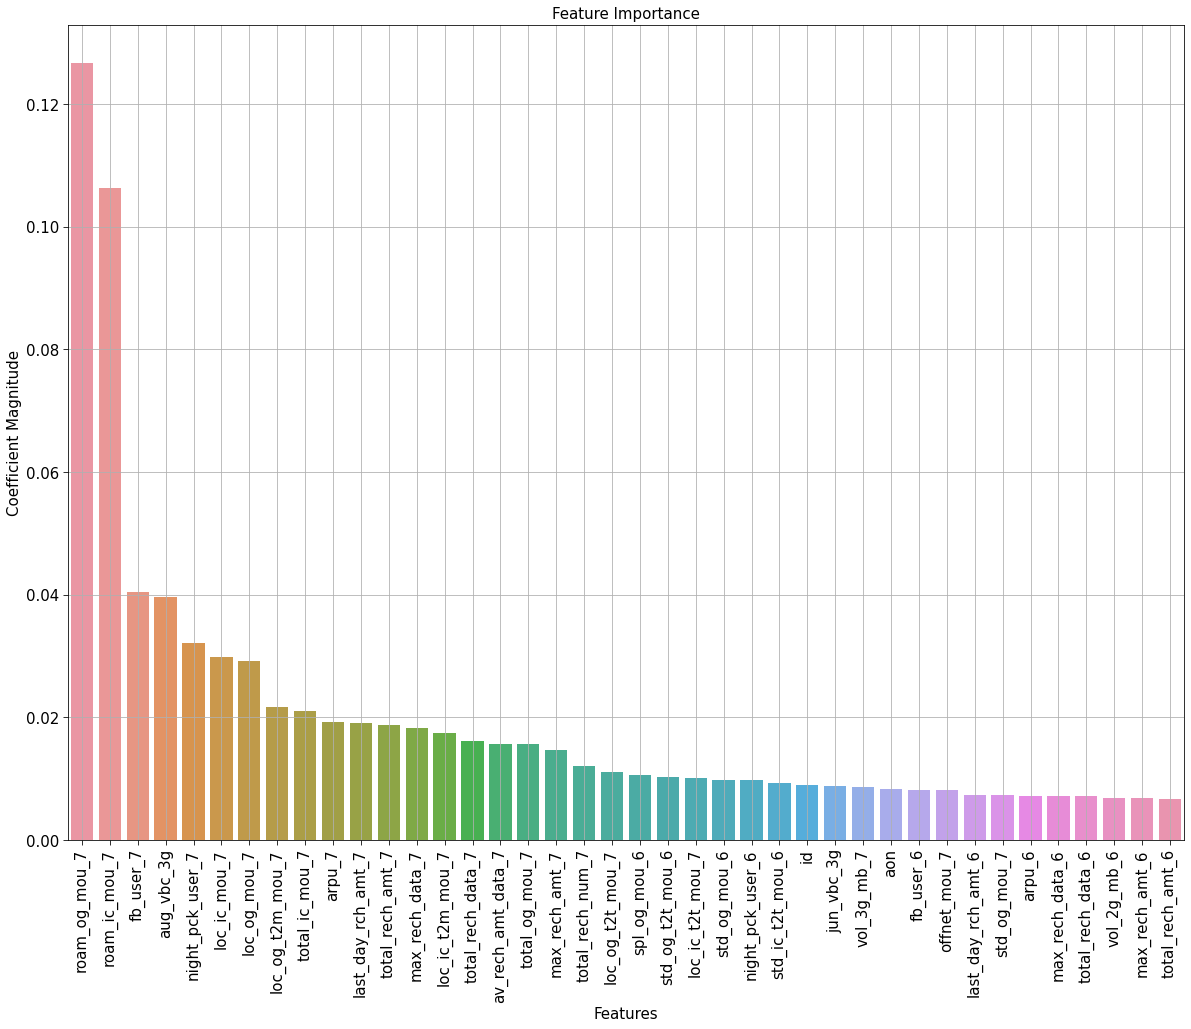

In [338]:
# Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "columns",y="feature_importance",data=FI)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Recomendations:

- From our model building we can infer that the Random Forest Classifier with all the features is the best candidate
- Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
- Previous month is really an important factor for churn prediction. For example to predict churn of 8, month 7 is most important month to consider
- Local calls minutes of usage has also has impact on churn.
- Large difference between recharge amount between 6th and 7th month, also impact churn.
- Users who are using more Roaminng in Outgoing and Incoming calls, are likely to churn.Compnay can focus on them too.

## Highest Accuracy we are acheiving with Decision Tree as below:

- 0.9477190835542865 ->  94.8 %

### Creating submission file:

In [425]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [460]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scaler = MinMaxScaler()
pca = PCA(n_components=32)
rf = RandomForestClassifier()

In [461]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scaler),
                         ('pca',pca),
                         ('model',rf)])

In [462]:
pipe.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', MinMaxScaler()), ('pca', PCA(n_components=16)),
                ('model', RandomForestClassifier())])

In [463]:
submission_data = test_df.set_index('id')[new_vars]
submission_data.shape

(30000, 94)

In [464]:
test_df['churn_probability'] = pipe.predict(submission_data)
output = test_df[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [465]:
output.to_csv('Submission.csv ',index=False)